<a href="https://colab.research.google.com/github/iabhibagaria/Abhi/blob/master/Gold_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here in this project we will predict the price of Gold. For this the flow chart will look like this:
1. Gold price data set
2. Data preprocessing
3. Data Analysis
4. Train test split
5. Random forest regressor model
6. Evalution

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Now as we have imported most of needed libraries, Now its time to import data.

In [27]:
metal_data = pd.read_csv('/content/gld_price_data.csv')

Now will explore data and processit

In [28]:
metal_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [29]:
metal_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [30]:
metal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [31]:
metal_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

From here we can observe that there are total 2290 entries, and 6 features and doesn't have any null values.

Now here GLD is the value of gold which we have to predict.
And all others are the features.
So we take GLD as the Target variable and all other as features variable

In [32]:
X = metal_data.drop(['Date', 'GLD'], axis=1)
Y = metal_data['GLD']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.22, random_state = 2)

Till upto now we have completed splitting od data in train and test sets.
Now we will made the model and train it and also obtain the predicted values>

In [34]:
model_select = RandomForestRegressor(n_estimators= 110)

In [35]:
model_select.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
predicted_values = model_select.predict(x_test)

Now will calculate the R^2 error of the model

In [37]:
error_score = metrics.r2_score(y_test, predicted_values)

In [38]:
print("R^2 error:", error_score)

R^2 error: 0.9903009274491775


This is a very good score!

Now will compare the predicted value with actual values by plotting them

In [39]:
y_test= list(y_test)

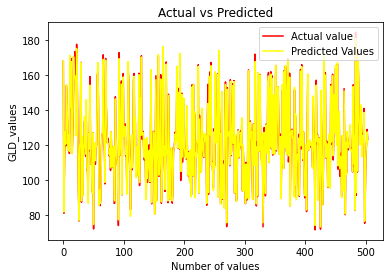

In [40]:
plt.plot(y_test, color='red', label='Actual value')
plt.plot(predicted_values, color='yellow', label='Predicted Values')
plt.title('Actual vs Predicted')
plt.xlabel('Number of values')
plt.ylabel('GLD_values')
plt.legend()
plt.show()